In [45]:
!pip install tensorflow


In [46]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
print(tf.__version__)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.19.0


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
#split dataset into independent and dependent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [50]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [51]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [52]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [53]:
#feature engineering
geography = pd.get_dummies(X['Geography'],drop_first=True,dtype = np.int64)
gender = pd.get_dummies(X['Gender'], drop_first=True,dtype = np.int64)

In [54]:
X = X.drop(['Geography','Gender'],axis=1)

In [55]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [56]:
X = pd.concat([X,geography,gender],axis=1)

In [57]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [58]:
#train-test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [59]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [60]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [61]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [62]:
X_train.shape

(8000, 11)

In [63]:
X_test.shape

(2000, 11)

In [64]:
#create ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU,ReLU
from tensorflow.keras.layers import Dropout

In [89]:
#initialize ANN
classifier = Sequential()

In [90]:
#Add input layer
classifier.add(Dense(units=11,activation='relu'))

In [91]:
#add first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.3))

In [92]:
#add second hidden layer
classifier.add(Dense(units=6, activation ='relu'))

In [93]:
##output layer
classifier.add(Dense(1,activation='sigmoid'))

In [94]:
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [95]:
classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [96]:
#early stopping
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [97]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size = 10, epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6544 - loss: 0.6301 - val_accuracy: 0.7959 - val_loss: 0.4649
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8084 - loss: 0.4543 - val_accuracy: 0.8058 - val_loss: 0.4329
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8114 - loss: 0.4347 - val_accuracy: 0.8152 - val_loss: 0.4187
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8190 - loss: 0.4109 - val_accuracy: 0.8289 - val_loss: 0.4048
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8268 - loss: 0.4038 - val_accuracy: 0.8338 - val_loss: 0.3932
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8271 - loss: 0.3948 - val_accuracy: 0.8395 - val_loss: 0.3809
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8455 - loss: 0.3664 - val_accuracy: 0.8451 - val_loss: 0.3748
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8357 - loss: 0.3798 - 

In [98]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

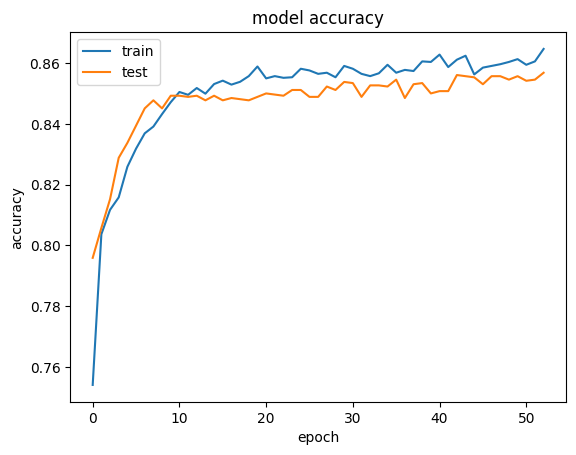

In [99]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

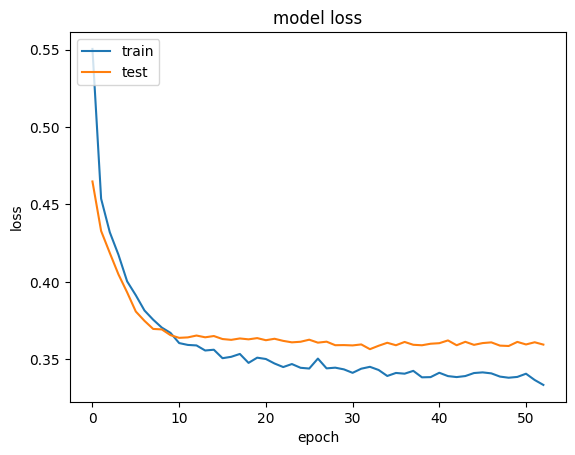

In [100]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [101]:
#predict
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1532,   63],
       [ 217,  188]])

In [103]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.86

In [104]:
#get weights
classifier.get_weights()

[array([[ 0.18638292,  0.17770147, -0.07374289, -0.17093122, -0.40247512,
          0.38883793,  0.06668547,  0.42523563, -0.3762997 , -0.0092982 ,
          0.06463983],
        [ 0.03274096, -0.6699978 ,  0.17869368,  0.823742  , -0.578023  ,
         -0.33202702,  0.28518647,  0.12846856,  0.18926303, -0.8110655 ,
          0.14856699],
        [ 0.23596661, -0.17226027,  0.124429  ,  0.04799288,  0.13939768,
          0.1029337 , -0.11573901,  0.3358049 ,  0.19551554,  0.01803671,
         -0.09120053],
        [-0.35679525, -0.09701594, -0.30885595,  0.14303842,  0.18421209,
         -0.18327807, -0.17710805, -0.45540527,  0.6388786 ,  0.48454875,
          0.42269695],
        [-0.05963783, -0.23244084, -1.152302  , -0.2893439 ,  0.16131039,
          0.09249739, -1.3346334 ,  0.48329976,  0.38987425, -0.36343563,
          0.99721   ],
        [ 0.06146096,  0.41725683, -0.0046494 ,  0.27938476, -0.39213887,
         -0.0542631 ,  0.28901592, -0.13484499, -0.22103287,  0.2260259